Expectativa de vida

Se toma una muestra para calcular la expectativa de las personas de acuerdo a sus paises.


https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated

# Librerias

In [1]:
import numpy as np
import pandas as pd

# Cargamos Informacíon

In [2]:
# Cargamos la informacion desde un archivo csv y generamos un dataframe
df_concrete = pd.read_csv('./data/Life_Expectancy_Data.csv')

In [8]:
# eliminar espacios y pasar nombres a minusculas de las columnas
df_concrete.columns = df_concrete.columns.str.strip().str.lower().str.replace(' ', '_')

# EDA

In [9]:
# Informacion de data frame
df_concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2904 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  polio               

DataFrame con mas de 2900 registros

In [10]:
#infromacion de los valores estadisticos
df_concrete.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [11]:
#Identificamos valores nulos en el dataframe
df_concrete.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness__1-19_years                34
thinness_5-9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [12]:
# Identificamos % de valores nulos en el dataframe
df_concrete.isnull().mean() * 100
# 15 % de valores nulos en la columnas

country                             0.000000
year                                0.000000
status                              0.000000
life_expectancy                     0.340368
adult_mortality                     0.340368
infant_deaths                       0.000000
alcohol                             6.603131
percentage_expenditure              0.000000
hepatitis_b                        18.822328
measles                             0.000000
bmi                                 1.157250
under-five_deaths                   0.000000
polio                               0.646698
total_expenditure                   7.692308
diphtheria                          0.646698
hiv/aids                            0.000000
gdp                                15.248468
population                         22.191967
thinness__1-19_years                1.157250
thinness_5-9_years                  1.157250
income_composition_of_resources     5.684139
schooling                           5.547992
dtype: flo

In [13]:
#Eliminamos registros donde no se tiene ninguna expectativa de vida
df_cleaned_target = df_concrete.dropna(subset=['life_expectancy'])

In [14]:
# verificamos los valores unicos en las columnas categoricas
df_cleaned_target.select_dtypes(include=['object']).nunique()

country    183
status       2
dtype: int64

In [15]:
# Visualizamos los valores categoricos
for col in df_cleaned_target.select_dtypes(include=['object']).columns:
    print(col)
    print(df_cleaned_target[col].unique()[:10])
    print(df_cleaned_target[col].nunique())
    print()

country
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan']
183

status
['Developing' 'Developed']
2



In [16]:
#Identificamos los años de información
df_cleaned_target.year.unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000])

In [20]:
# import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: title={'center': 'Life Expectancy over Years'}, xlabel='Year', ylabel='Life Expectancy'>

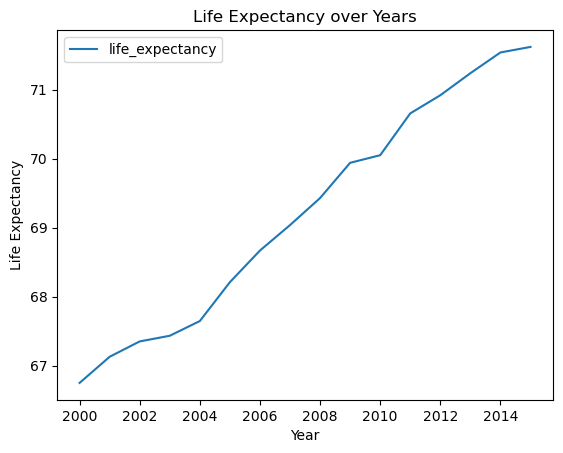

In [17]:
#pivot entre years y media de life_expectancy
df_pivot = df_cleaned_target.pivot_table(values='life_expectancy', index='year', aggfunc='mean')
df_pivot.plot(title='Life Expectancy over Years', ylabel='Life Expectancy', xlabel='Year')

<Axes: title={'center': 'Life Expectancy over Years by Status'}, xlabel='Year', ylabel='Life Expectancy'>

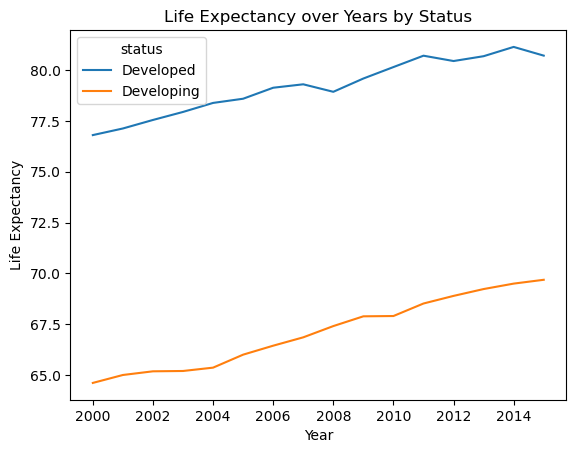

In [18]:
#pivot entre years y media de life_expectancy agrupdatos por status
df_pivot = df_cleaned_target.pivot_table(values='life_expectancy', index='year', columns='status', aggfunc='mean')
df_pivot.plot(title='Life Expectancy over Years by Status', ylabel='Life Expectancy', xlabel='Year')

<Axes: xlabel='life_expectancy', ylabel='Count'>

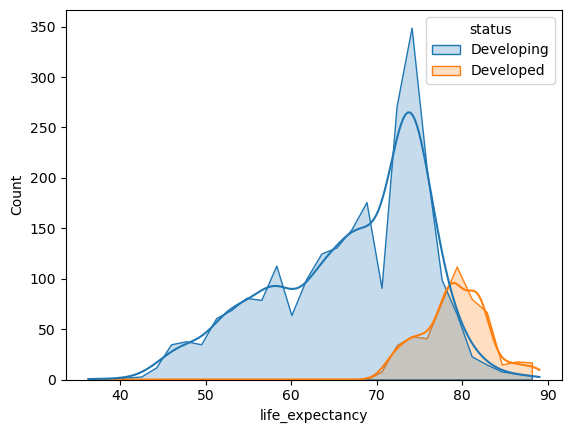

In [21]:
#sns.histplot(df_pivot['life_expectancy'], kde=True, hue='status')

sns.histplot(data=df_cleaned_target,x='life_expectancy',hue='status', kde=True,element='poly')

<Axes: title={'center': 'Life Expectancy over Years by Status'}, xlabel='Year', ylabel='Life Expectancy'>

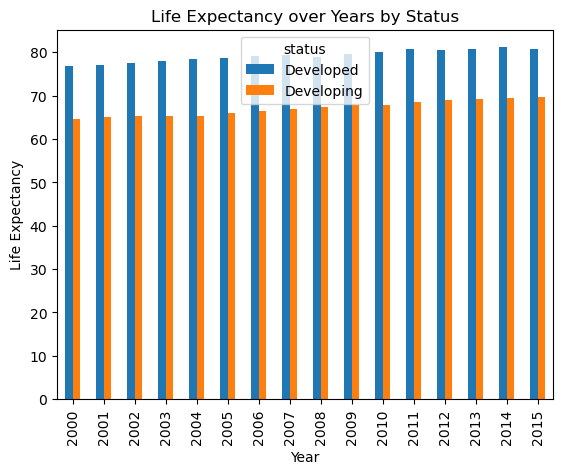

In [22]:
# Grafica plotbar 
df_pivot.plot(kind='bar', title='Life Expectancy over Years by Status', ylabel='Life Expectancy', xlabel='Year')

<Axes: title={'center': 'Infant Deaths over Years by Status'}, xlabel='Year', ylabel='Infant Deaths'>

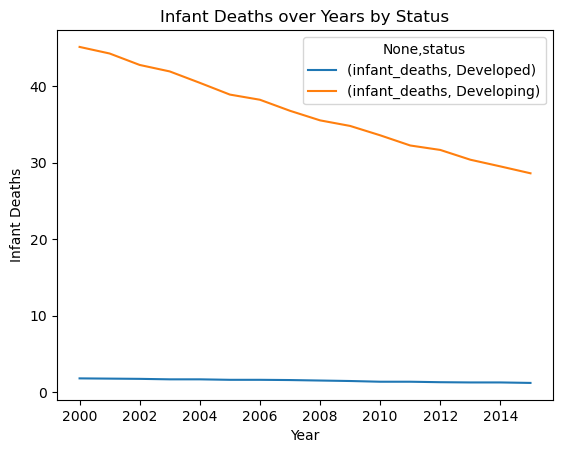

In [23]:
#pivot entre years y media de infant_deaths agrupdatos por status
df_pivot = df_cleaned_target.pivot_table(values=['infant_deaths'], index='year', aggfunc='mean', columns='status')
df_pivot.plot(title='Infant Deaths over Years by Status', ylabel='Infant Deaths', xlabel='Year')

<Axes: title={'center': 'Population over Years by Status'}, xlabel='Year', ylabel='Population'>

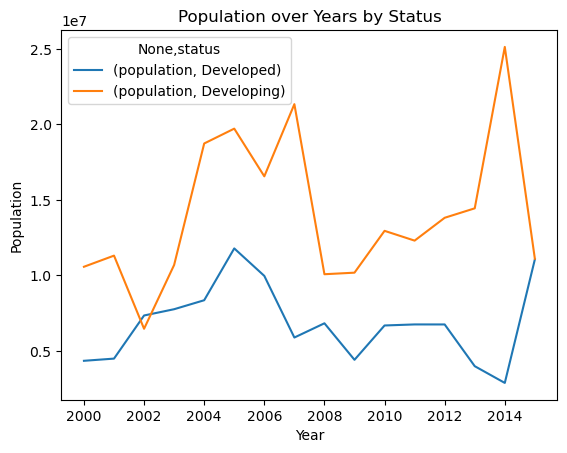

In [24]:
#pivot entre years y media de population agrupdatos por status
df_pivot = df_cleaned_target.pivot_table(values=['population'], index='year', aggfunc='mean', columns='status')
df_pivot.plot(title='Population over Years by Status', ylabel='Population', xlabel='Year')

In [31]:
# Dataframe por status
df_cleaned_target_status_deved = df_cleaned_target[df_cleaned_target['status']=='Developed']
df_cleaned_target_status_deving = df_cleaned_target[df_cleaned_target['status']=='Developing']

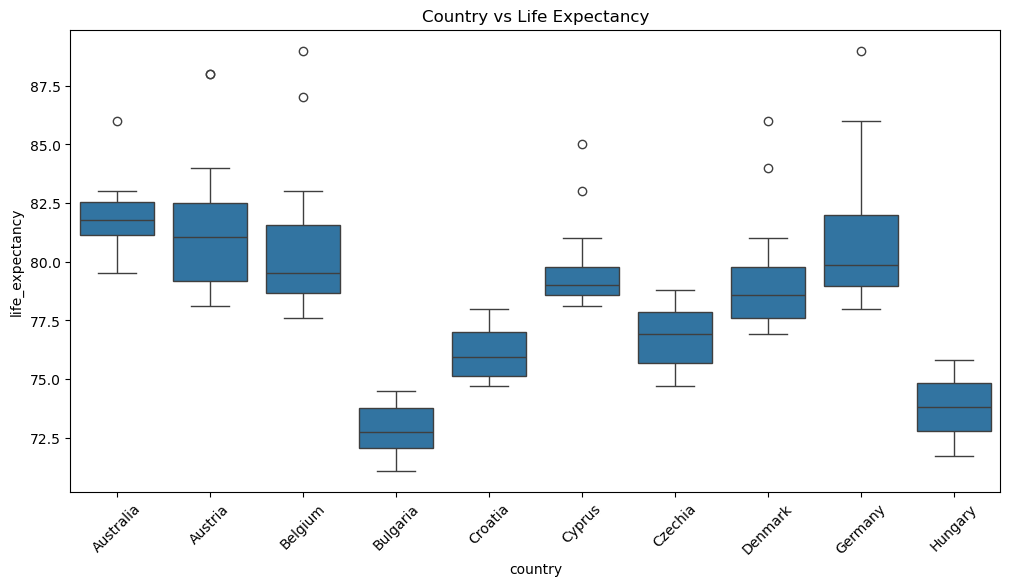

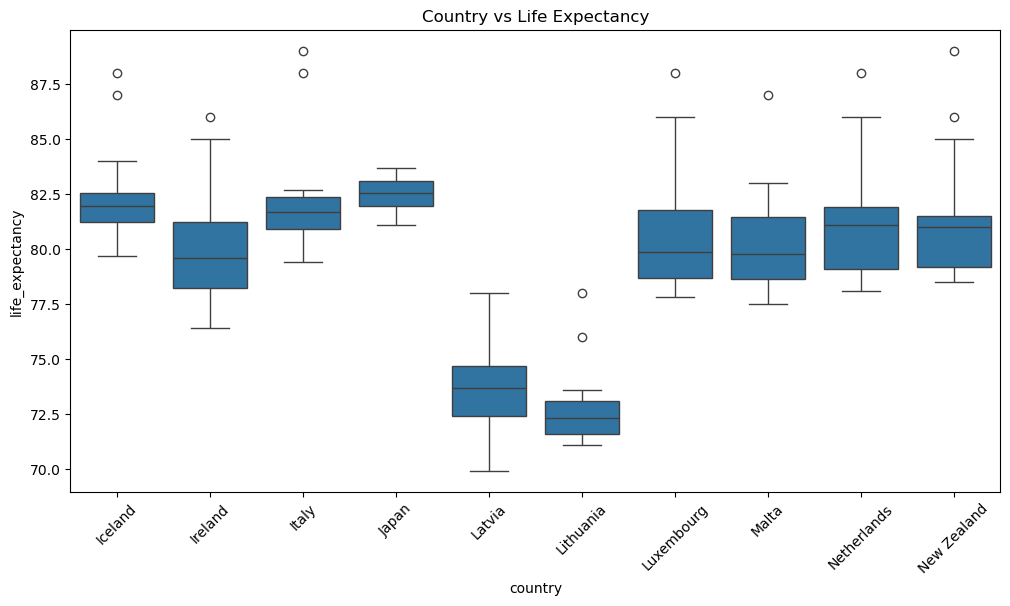

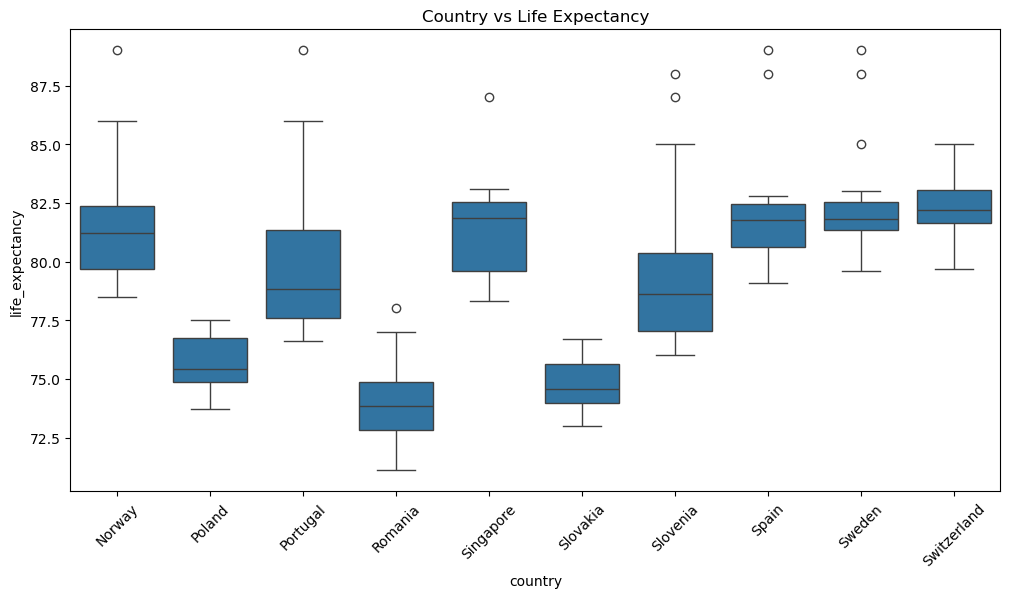

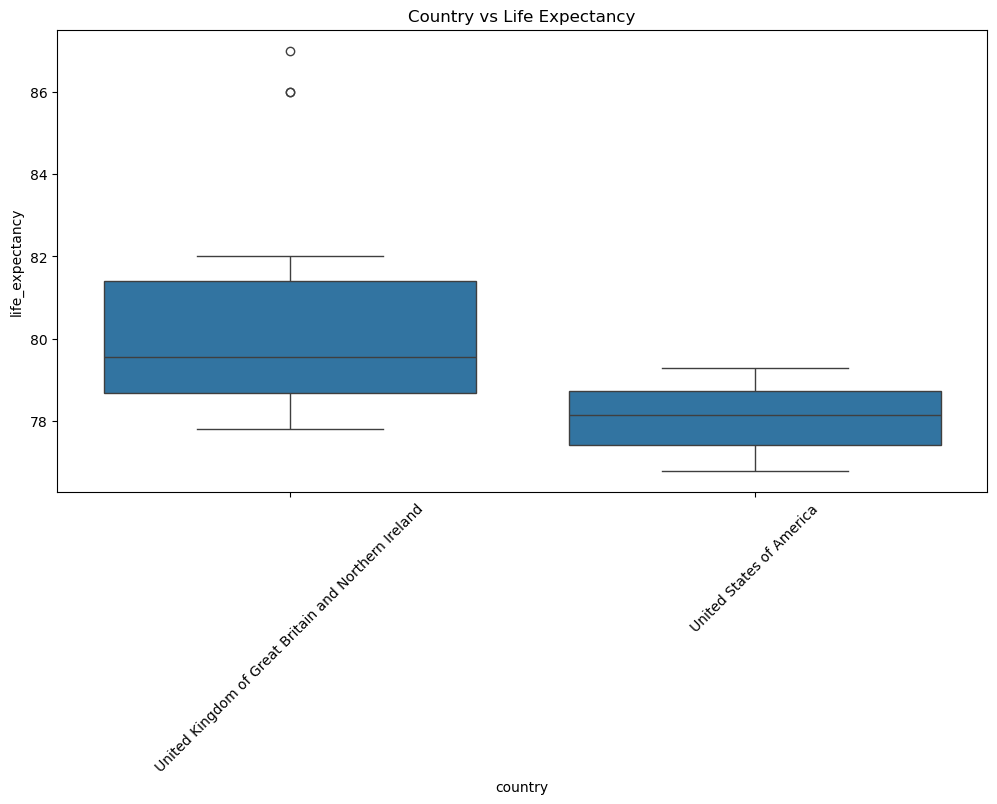

In [32]:
#Listado de paises unicos
#Iteraramos de 5 paises por grafica
countries = df_cleaned_target_status_deved.country.unique()

for i in range(0, len(countries), 10):
    plt.figure(figsize=(12, 6))
    subset_countries = countries[i:i+10]
    subset_data = df_cleaned_target_status_deved[df_cleaned_target_status_deved['country'].isin(subset_countries)]
    sns.boxplot(x='country', y='life_expectancy', data=subset_data)
    plt.title('Country vs Life Expectancy')
    plt.xticks(rotation=45)
    plt.show()

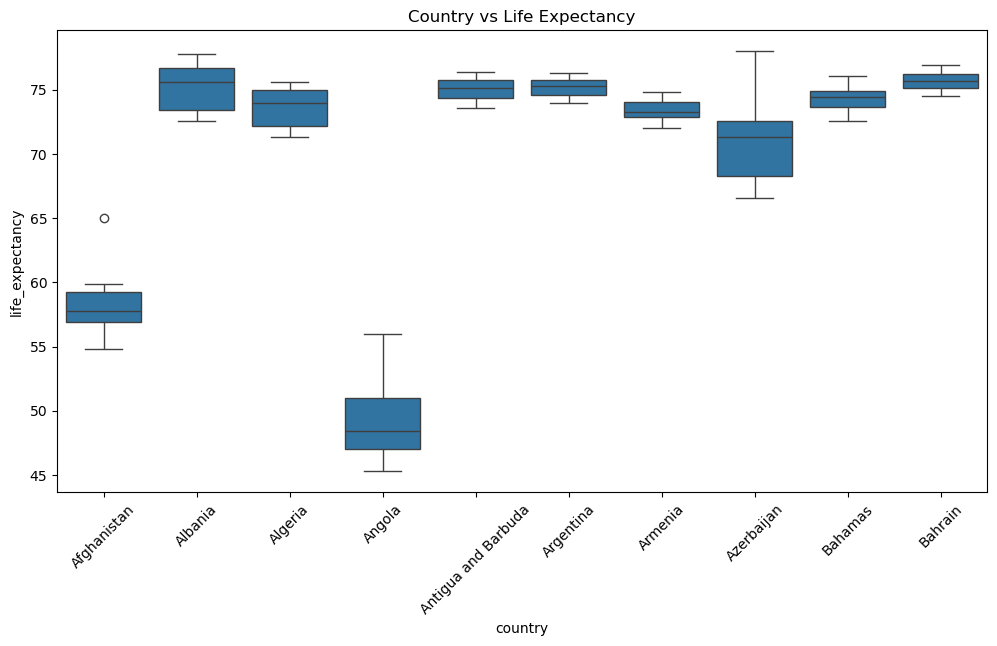

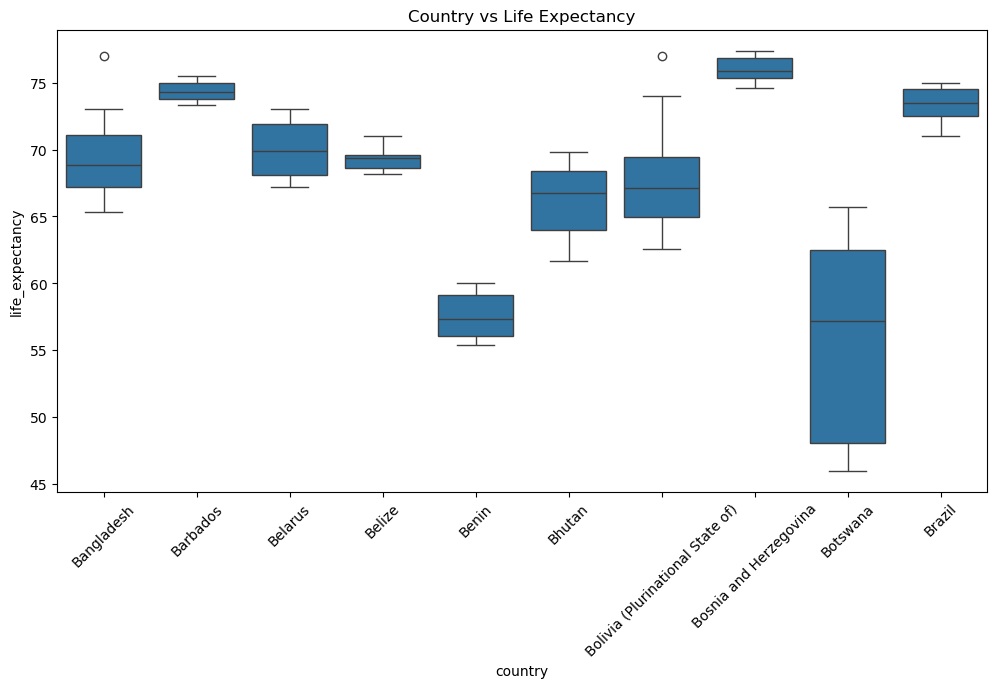

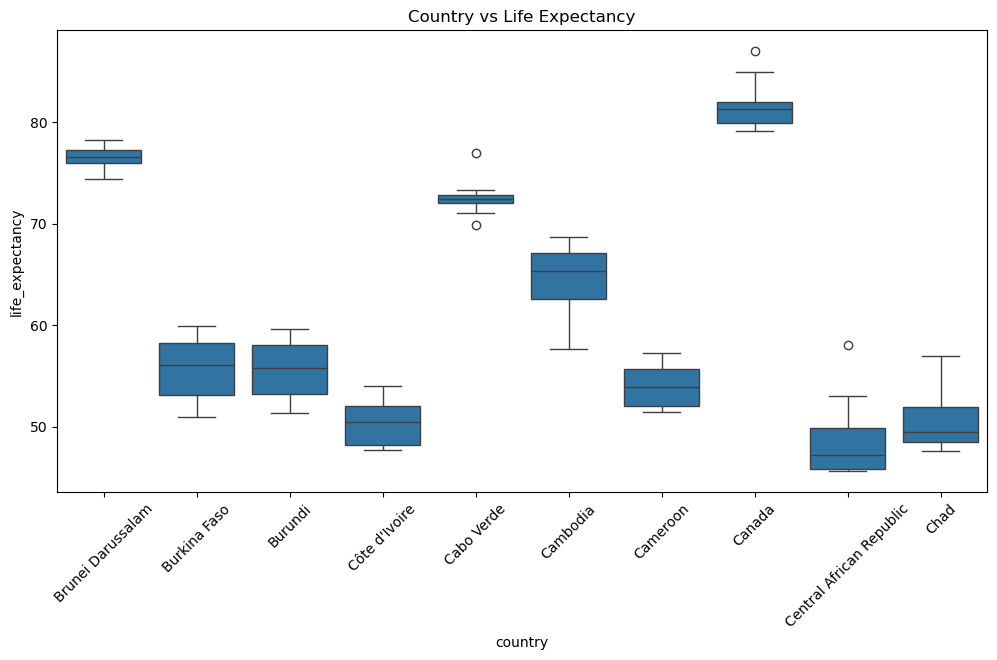

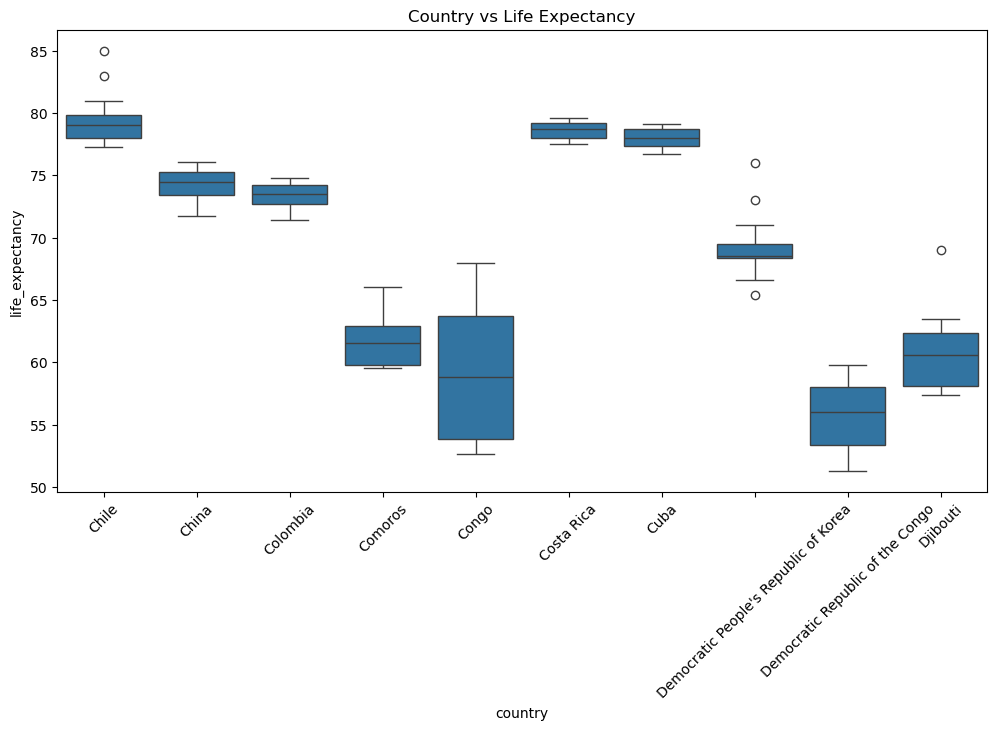

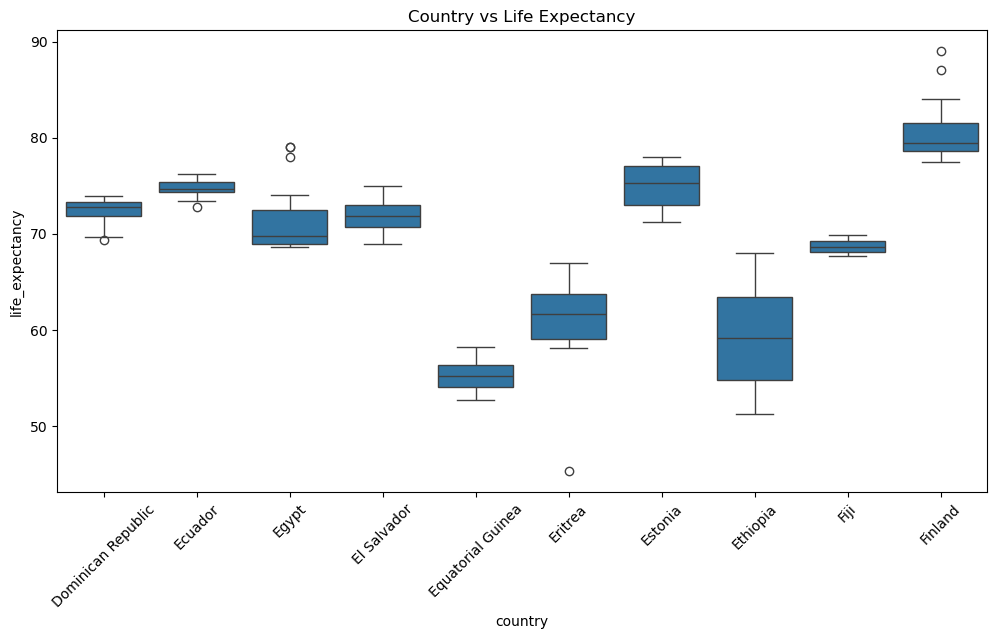

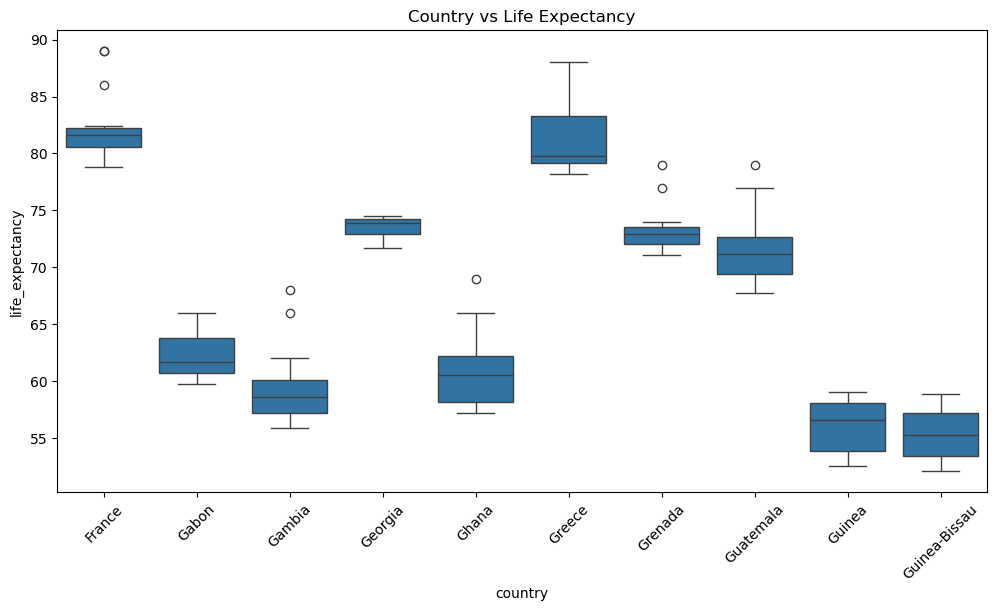

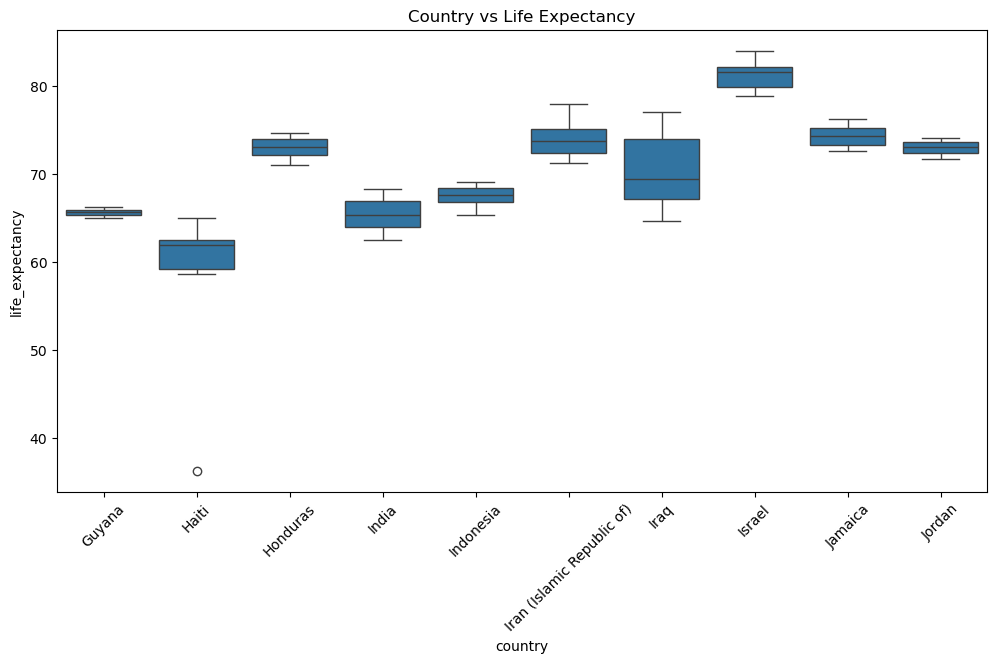

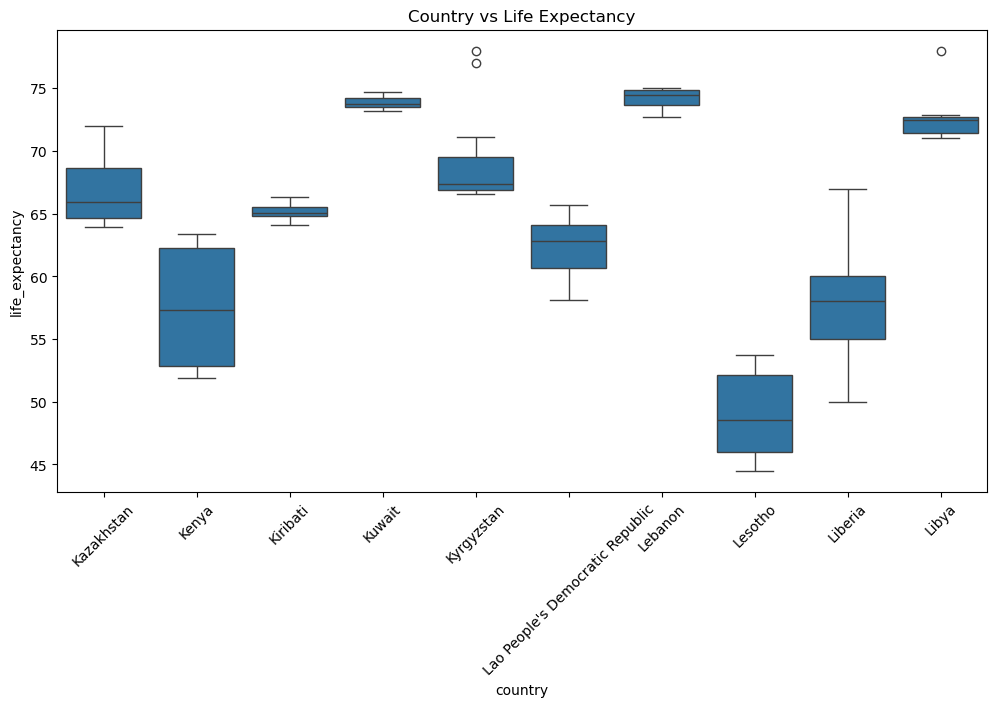

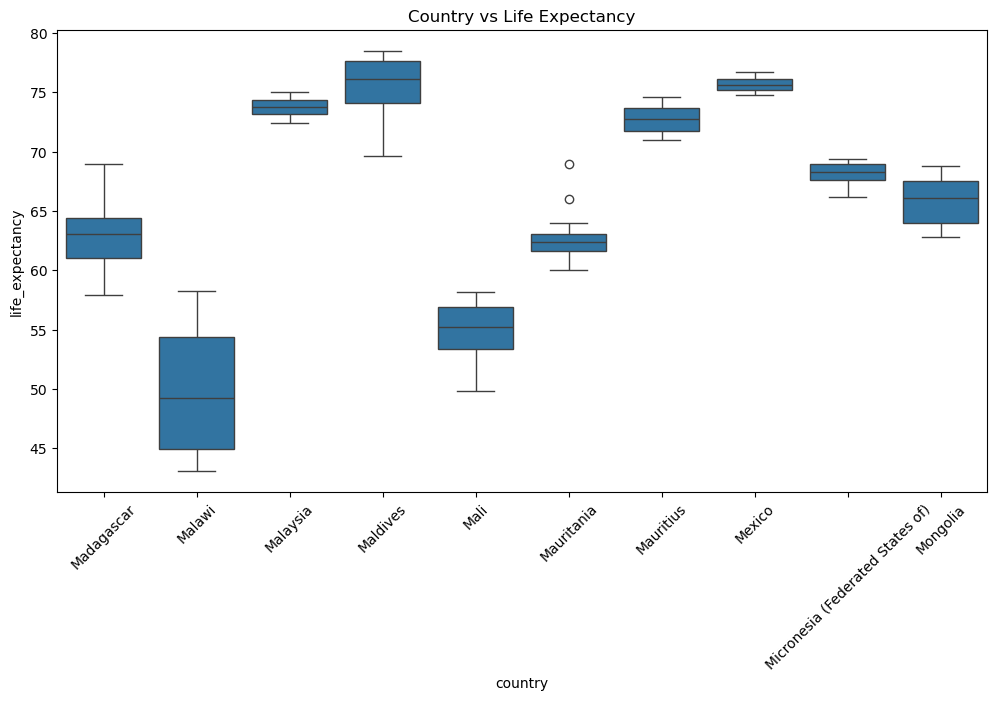

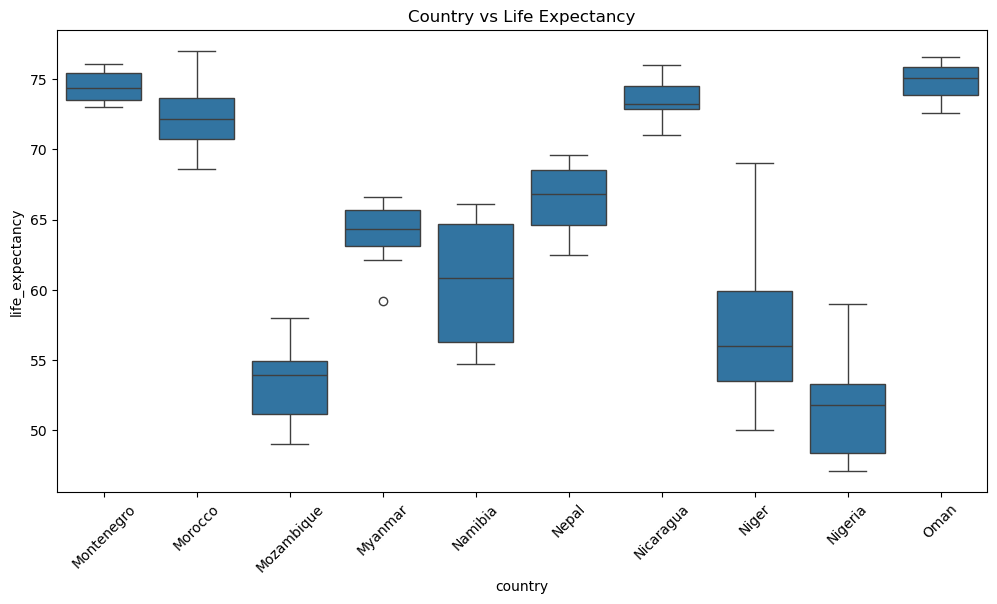

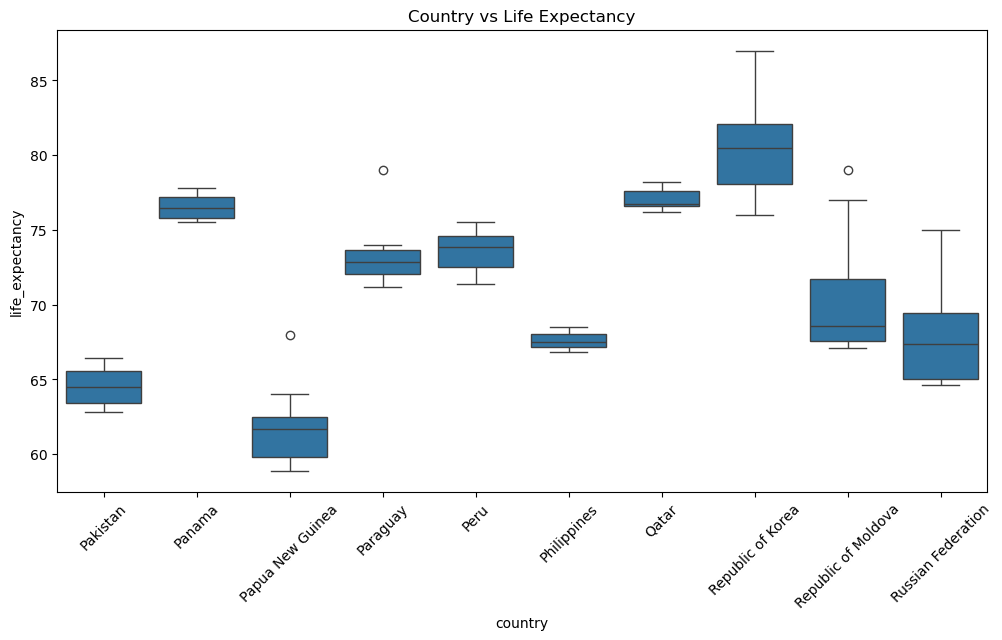

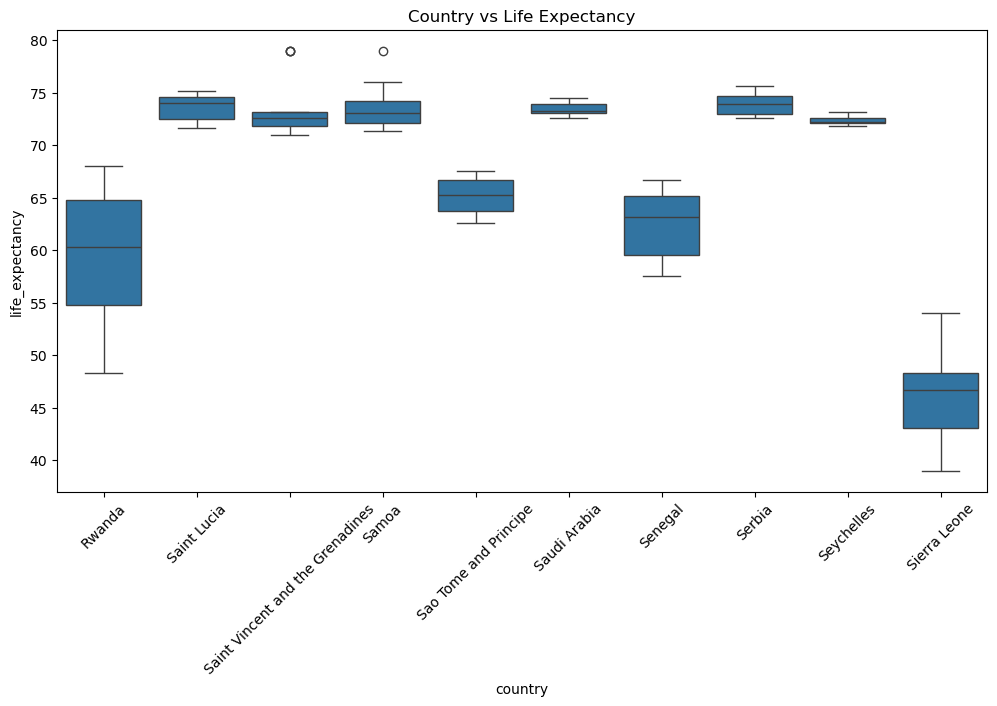

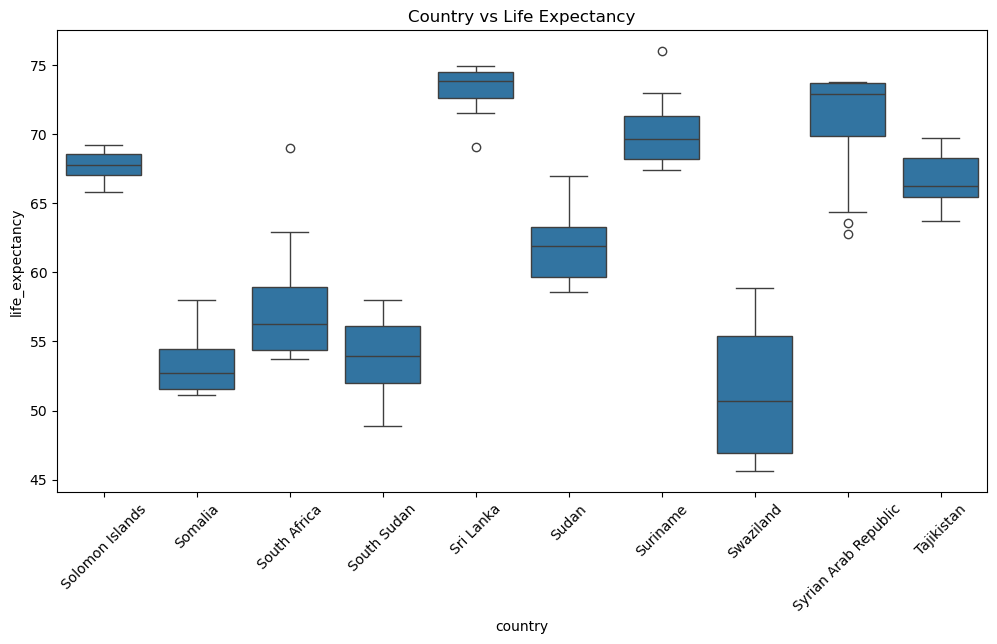

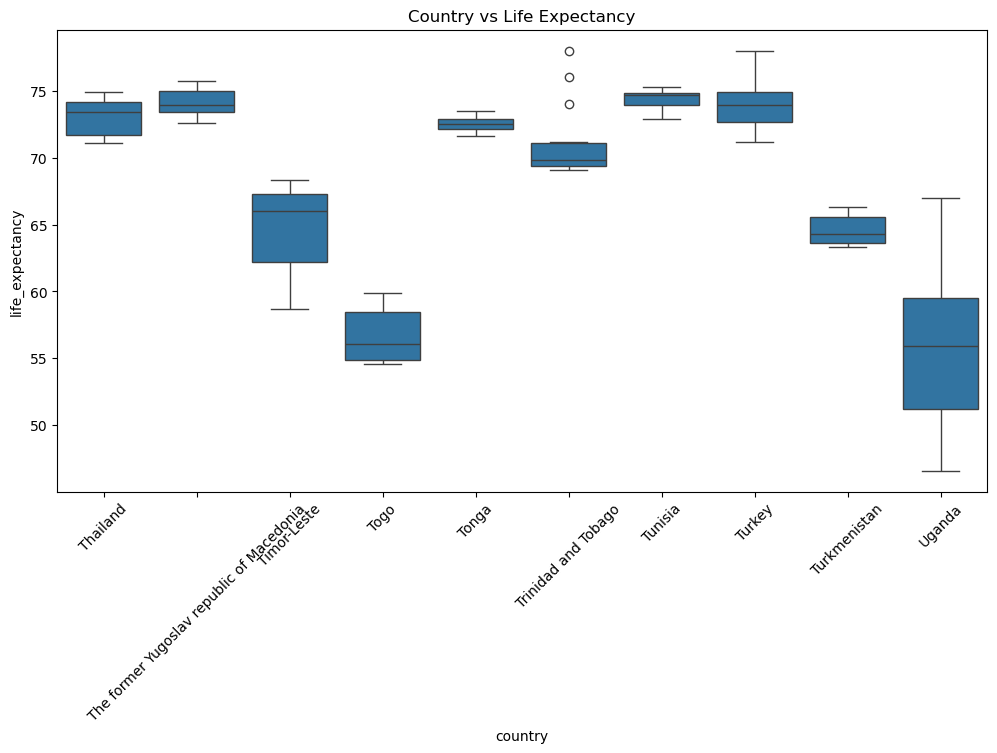

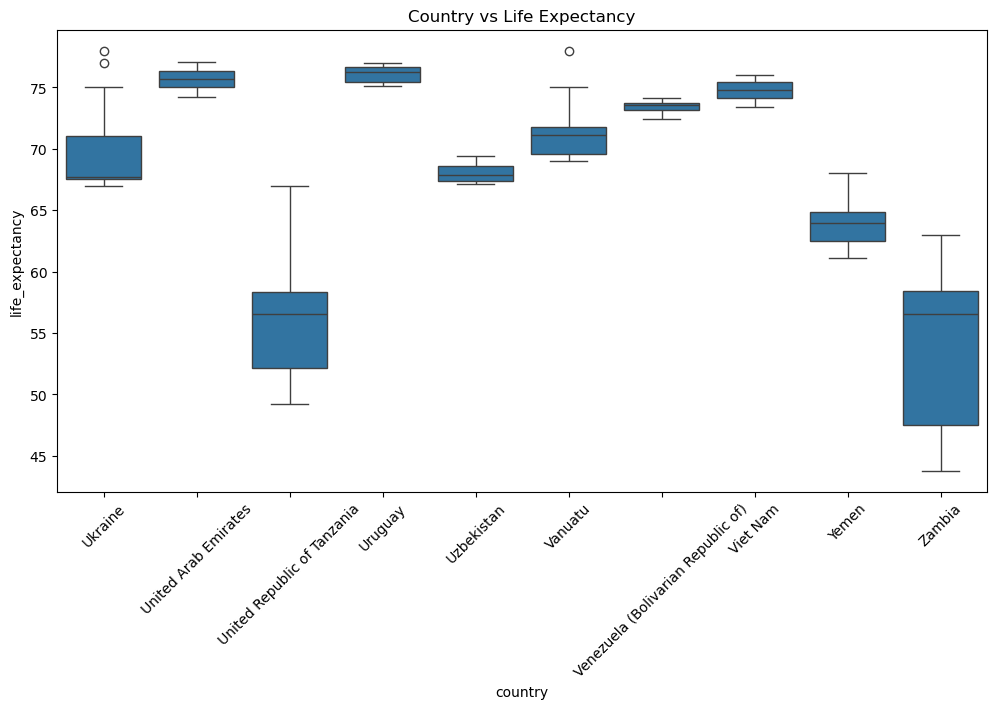

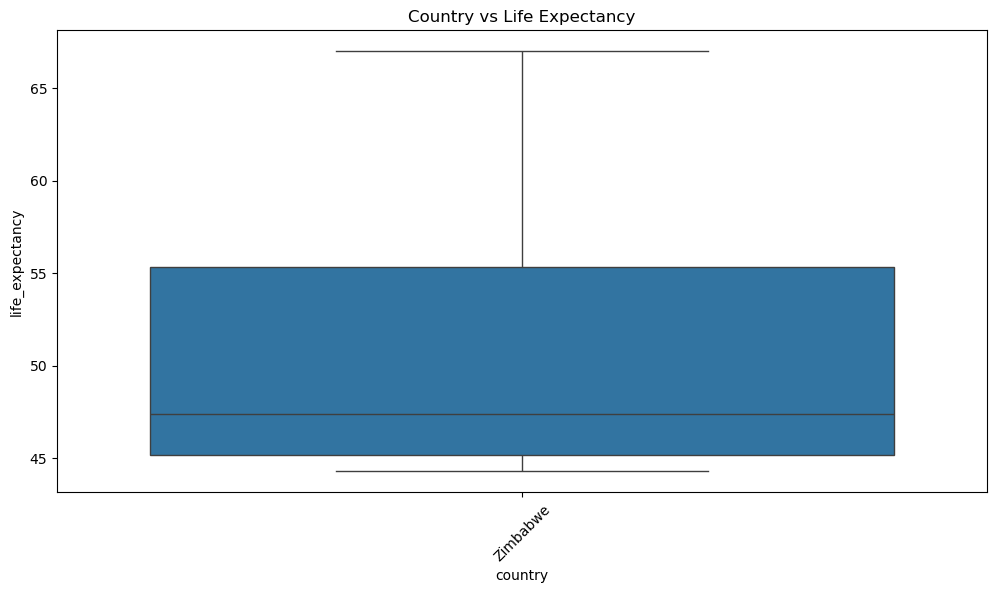

In [33]:
#Listado de paises unicos
#Iteraramos de 5 paises por grafica
countries = df_cleaned_target_status_deving.country.unique()

for i in range(0, len(countries), 10):
    plt.figure(figsize=(12, 6))
    subset_countries = countries[i:i+10]
    subset_data = df_cleaned_target_status_deving[df_cleaned_target_status_deving['country'].isin(subset_countries)]
    sns.boxplot(x='country', y='life_expectancy', data=subset_data)
    plt.title('Country vs Life Expectancy')
    plt.xticks(rotation=45)
    plt.show()

In [34]:
# Seleccionar las columnas numericas y generar una matrix de correlacion
numeric_cols = df_cleaned_target.select_dtypes(include=[np.number]).columns
correlation_matrix = df_cleaned_target[numeric_cols].corr()

In [35]:
correlation_matrix

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
year,1.000000,0.170033,-0.079052,-0.036464,-0.049175,0.032723,0.105898,-0.081840,0.104668,-0.041980,0.094498,0.087309,0.134817,-0.138789,0.102707,0.017199,-0.045082,-0.048152,0.242953,0.213265
life_expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
adult_mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant_deaths,-0.036464,-0.196557,0.078756,1.000000,-0.116647,-0.085906,-0.224750,0.501038,-0.227480,0.996628,-0.171063,-0.128826,-0.175539,0.024955,-0.108643,0.556781,0.465700,0.471340,-0.145018,-0.195202
alcohol,-0.049175,0.404877,-0.195848,-0.116647,1.000000,0.341112,0.086217,-0.052569,0.338253,-0.113388,0.222057,0.302902,0.222378,-0.049918,0.354406,-0.035376,-0.432302,-0.420862,0.450254,0.548001
percentage_expenditure,0.032723,0.381864,-0.242860,-0.085906,0.341112,1.000000,0.016704,-0.056831,0.231130,-0.088152,0.147664,0.176245,0.144022,-0.098230,0.899370,-0.025716,-0.252397,-0.253931,0.382244,0.391466
hepatitis_b,0.105898,0.256762,-0.162476,-0.224750,0.086217,0.016704,1.000000,-0.121211,0.155174,-0.234353,0.483989,0.070983,0.610199,-0.113395,0.083918,-0.123834,-0.122479,-0.127039,0.199141,0.222895
measles,-0.081840,-0.157586,0.031176,0.501038,-0.052569,-0.056831,-0.121211,1.000000,-0.176069,0.507718,-0.136460,-0.106405,-0.142174,0.030673,-0.076646,0.265936,0.224579,0.220836,-0.129465,-0.138344
bmi,0.104668,0.567694,-0.387017,-0.227480,0.338253,0.231130,0.155174,-0.176069,1.000000,-0.237910,0.287579,0.238765,0.286077,-0.243735,0.304442,-0.072051,-0.530805,-0.537784,0.509299,0.558363
under-five_deaths,-0.041980,-0.222529,0.094146,0.996628,-0.113388,-0.088152,-0.234353,0.507718,-0.237910,1.000000,-0.189137,-0.130355,-0.196083,0.037783,-0.112302,0.544401,0.467771,0.472244,-0.163185,-0.210945


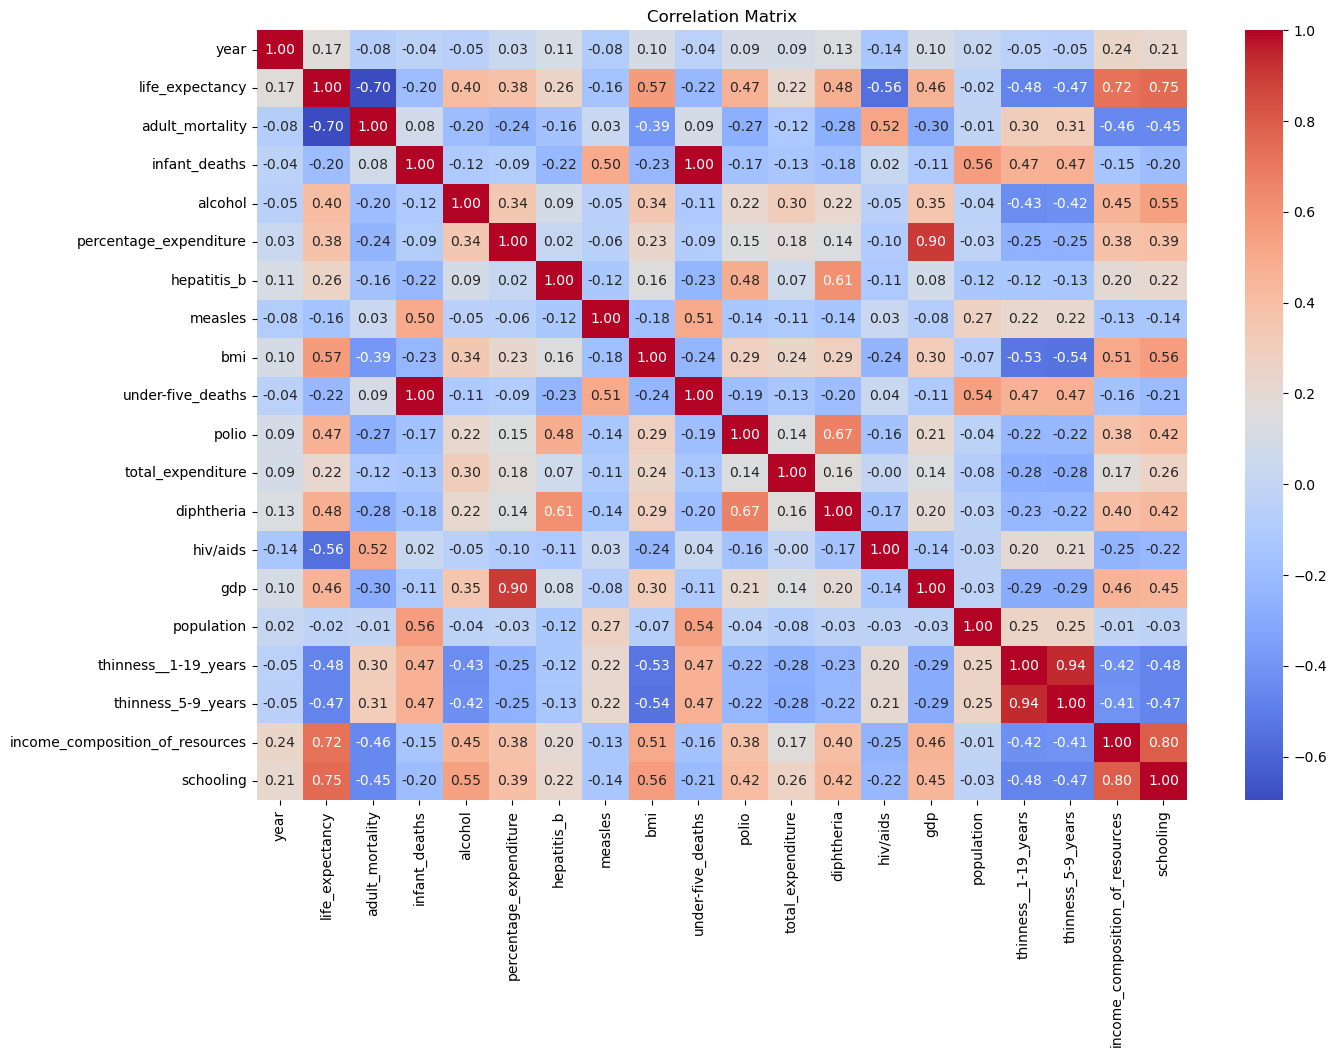

In [36]:
#correlacion entre variables numericas
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## Mapping

In [37]:
countries = df_cleaned_target.country.unique()
status = df_cleaned_target.status.unique()

In [38]:
status

array(['Developing', 'Developed'], dtype=object)

In [39]:
# mapear cada pais a un numero entero

country_mapping = {country: idx for idx, country in enumerate(countries)}
status_mapping = {status: idx for idx, status in enumerate(status)}

In [40]:
df_cleaned_target['country_idx'] = df_cleaned_target['country'].map(country_mapping)
df_cleaned_target['status_idx'] = df_cleaned_target['status'].map(status_mapping)

C:\Users\ITPB-RH\AppData\Local\Temp\ipykernel_15860\2714970086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_target['country_idx'] = df_cleaned_target['country'].map(country_mapping)
C:\Users\ITPB-RH\AppData\Local\Temp\ipykernel_15860\2714970086.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_target['status_idx'] = df_cleaned_target['status'].map(status_mapping)


In [41]:
df_cleaned_target.status_idx.unique()

array([0, 1])

In [42]:
df_cleaned_target.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,country_idx,status_idx
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,0
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,0
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,0
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,0


In [43]:
# Visualizamos los valores categoricos
for col in df_cleaned_target.select_dtypes(include=['object']).columns:
    print(col)
    print(df_cleaned_target[col].unique()[:10])
    print(df_cleaned_target[col].nunique())
    print()

country
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan']
183

status
['Developing' 'Developed']
2



In [46]:
df_cleaned_target.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling',
       'country_idx', 'status_idx'],
      dtype='object')

In [44]:
# Imputation with scikit-learn
from sklearn.impute import SimpleImputer

imputer = SimpleImputer()

In [54]:
# import pipeline
from sklearn.pipeline import Pipeline

steps = [('imputation', SimpleImputer())]
pipeline = Pipeline(steps)

In [52]:
df_numeric = df_cleaned_target[['life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling']]

In [51]:
df_numeric.isna().sum()

year                                 0
life_expectancy                      0
adult_mortality                      0
infant_deaths                        0
alcohol                            193
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 32
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                443
population                         644
thinness__1-19_years                32
thinness_5-9_years                  32
income_composition_of_resources    160
schooling                          160
dtype: int64

In [53]:
df_numeric.describe()

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2928.000000,2928.000000,2928.000000,2735.000000,2928.000000,2375.000000,2928.000000,2896.000000,2928.000000,2909.000000,2702.000000,2909.000000,2928.000000,2485.000000,2.284000e+03,2896.000000,2896.000000,2768.000000,2768.000000
mean,69.224932,164.796448,30.407445,4.614856,740.321185,80.960842,2427.855874,38.235394,42.179303,82.548298,5.930163,82.321416,1.747712,7494.210719,1.276454e+07,4.850622,4.881423,0.627419,11.999639
std,9.523867,124.292079,118.114450,4.050749,1990.930605,25.018337,11485.970937,19.959590,160.700547,23.416674,2.483273,23.706644,5.085542,14282.251492,6.103765e+07,4.420829,4.509609,0.210978,3.346440
min,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.100000,74.000000,0.000000,0.905000,4.853964,77.000000,0.000000,19.300000,0.000000,78.000000,4.260000,78.000000,0.100000,463.852618,1.966738e+05,1.600000,1.575000,0.493000,10.100000
50%,72.100000,144.000000,3.000000,3.770000,65.611455,92.000000,17.000000,43.350000,4.000000,93.000000,5.750000,93.000000,0.100000,1764.973870,1.391756e+06,3.300000,3.400000,0.677000,12.300000
75%,75.700000,228.000000,22.000000,7.715000,442.614322,97.000000,362.250000,56.100000,28.000000,97.000000,7.490000,97.000000,0.800000,5932.899677,7.426746e+06,7.200000,7.200000,0.779250,14.300000
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [55]:
# llenamos columnas nullas con la media de cada columna
df_numeric_imputed = pd.DataFrame(pipeline.fit_transform(df_numeric), columns=df_numeric.columns)

In [56]:
#no se observan cambios
df_numeric_imputed.describe()

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2.928000e+03,2928.000000,2928.000000,2928.000000,2928.000000
mean,69.224932,164.796448,30.407445,4.614856,740.321185,80.960842,2427.855874,38.235394,42.179303,82.548298,5.930163,82.321416,1.747712,7494.210719,1.276454e+07,4.850622,4.881423,0.627419,11.999639
std,9.523867,124.292079,118.114450,3.914923,1990.930605,22.531361,11485.970937,19.850184,160.700547,23.340548,2.385478,23.629576,5.085542,13157.128331,5.390628e+07,4.396597,4.484890,0.205131,3.253691
min,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.100000,74.000000,0.000000,1.107500,4.853964,80.960842,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,578.797095,4.181205e+05,1.600000,1.600000,0.504000,10.300000
50%,72.100000,144.000000,3.000000,4.160000,65.611455,87.000000,17.000000,43.000000,4.000000,93.000000,5.930163,93.000000,0.100000,3112.560501,3.640009e+06,3.400000,3.400000,0.662000,12.100000
75%,75.700000,228.000000,22.000000,7.400000,442.614322,96.000000,362.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7494.210719,1.276454e+07,7.100000,7.200000,0.773000,14.100000
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [57]:
# 
df_data = pd.concat([df_cleaned_target[['country_idx', 'status_idx','year']].reset_index(drop=True), df_numeric_imputed.reset_index(drop=True)], axis=1)

# Split

In [58]:
X = df_data.drop('life_expectancy',axis=1)
y = df_numeric_imputed.life_expectancy

In [60]:
# Split el datase en train y test, usa el 80 para train y 20 para test
from sklearn.model_selection import train_test_split

df_train = X
df_y = y
    
X_train, X_test, y_train, y_test = train_test_split(
    df_train, df_y, test_size=0.2, random_state=42)

In [61]:
X_train.shape, X_test.shape

((2342, 21), (586, 21))

In [62]:
X_train.head()

,country_idx,status_idx,year,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
2259,141,0,2012,126.0,1.0,9.380000,742.510971,97.000000,0.0,58.3,...,93.0,9.890000,91.0,0.1,5659.382400,7.199770e+05,2.1,2.1,0.767000,14.000000
1677,104,0,2002,179.0,0.0,4.140000,369.631710,88.000000,0.0,26.4,...,88.0,4.240000,88.0,0.1,3957.512960,1.246210e+05,7.9,7.9,0.683000,12.500000
2775,173,0,2008,376.0,92.0,3.440000,0.000000,86.000000,3413.0,19.6,...,89.0,4.210000,86.0,7.4,7494.210719,1.276454e+07,7.3,7.3,0.627419,11.999639
2503,156,1,2008,62.0,0.0,6.900000,8105.590882,80.960842,25.0,56.5,...,98.0,9.230000,98.0,0.1,55746.842380,9.219637e+06,1.3,1.3,0.897000,15.700000
1088,68,0,2015,275.0,4.0,4.614856,0.000000,87.000000,153.0,26.3,...,87.0,5.930163,87.0,3.2,596.871719,1.775260e+05,7.1,7.0,0.421000,9.200000


In [63]:
# no hay valores categoricos, one hot encoding genera muchas columnas
#from sklearn.feature_extraction import DictVectorizer
#dv = DictVectorizer(sparse=False)

In [64]:
X_train_dict = X_train #dv.fit_transform(X_train.to_dict(orient='records'))
X_test_dict = X_test #dv.transform(X_test.to_dict(orient='records'))

# Models

**Multicolinealidad**: Considera eliminar una de cada par de variables altamente correlacionadas para evitar redundancia:
   - Mantener solo `under-five_deaths` (eliminar `infant_deaths`)
   - Mantener solo una variable de `thinness`
   - Decidir entre `gdp` y `percentage_expenditure`
3. **Feature Engineering**: `schooling` e `income_composition` podrían combinarse en un índice de desarrollo
4. **Variables a considerar eliminar**: `population` y `measles` por su baja correlación con el target

# Linear

In [65]:
# Importamos el modelo de regresion lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()  

# Definimos las variables predictoras y la variable objetivo
model.fit(X_train_dict, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [66]:
model.coef_, model.intercept_

(array([ 4.46645686e-03,  1.37008539e+00, -1.48322784e-03, -2.03676505e-02,
         1.00310632e-01,  8.39257757e-02,  1.14673750e-04, -1.38415228e-02,
        -2.92268406e-05,  4.15959282e-02, -7.40733202e-02,  2.99310724e-02,
         4.44217216e-02,  3.92265169e-02, -4.82628164e-01,  3.21514944e-05,
        -9.58171122e-10, -8.84560822e-02, -5.64551681e-03,  5.61302433e+00,
         6.48243386e-01]),
 np.float64(57.947277499517796))

In [68]:
# Retorna el score del modelo, R²
score = model.score(X_test_dict, y_test)

In [70]:
#prinnt score
print(f'Linear regression R²: {score}')

Linear regression R²: 0.8222090887615809


# XGBoost

In [71]:
import xgboost as xgb

In [75]:

model_xgboost = xgb.XGBRegressor(objective ='reg:squarederror',learning_rate = 0.05, max_depth = 2, n_estimators = 100)


In [76]:
model_xgboost.fit(X_train_dict, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [77]:
score_xgboost = model_xgboost.score(X_test_dict, y_test)

In [78]:
# print xgboost score
print(f'XGBoost regression R²: {score_xgboost}')

XGBoost regression R²: 0.91624193998704


# Model selection

# Bagging

In [79]:
# radomforestregressor
from sklearn.ensemble import RandomForestRegressor

In [80]:
n_estmimators = [10,20,35,50, 100, 200, 300, 400, 500]
max_depth = [10,15,20,25,30]

bagging_results = []

for n in n_estmimators:
    for depth in max_depth:
        model = RandomForestRegressor(n_estimators=n, max_depth=depth, random_state=42)
        model.fit(X_train_dict, y_train)
        score = model.score(X_test_dict, y_test)
        print(f"Random Forest Regressor with {n} estimators and max depth {depth}: R² score = {score}")
        bagging_results.append({'estimators':n, 'depth':depth, 'score':score})

Random Forest Regressor with 10 estimators and max depth 10: R² score = 0.959050515938879
Random Forest Regressor with 10 estimators and max depth 15: R² score = 0.9603073886777739
Random Forest Regressor with 10 estimators and max depth 20: R² score = 0.9611724117363114
Random Forest Regressor with 10 estimators and max depth 25: R² score = 0.9609592106057835
Random Forest Regressor with 10 estimators and max depth 30: R² score = 0.9609592106057835
Random Forest Regressor with 20 estimators and max depth 10: R² score = 0.9632360788603308
Random Forest Regressor with 20 estimators and max depth 15: R² score = 0.9651837108714507
Random Forest Regressor with 20 estimators and max depth 20: R² score = 0.9648907399880121
Random Forest Regressor with 20 estimators and max depth 25: R² score = 0.9649822134443817
Random Forest Regressor with 20 estimators and max depth 30: R² score = 0.9650078516914556
Random Forest Regressor with 35 estimators and max depth 10: R² score = 0.9626817544275893


In [81]:
# generar dataframe desde bagging_results
df_bagging_results = pd.DataFrame(bagging_results)

In [82]:
df_bagging_results.pivot(index='estimators', columns='depth', values='score')

depth,10,15,20,25,30
estimators,,,,,
10,0.959051,0.960307,0.961172,0.960959,0.960959
20,0.963236,0.965184,0.964891,0.964982,0.965008
35,0.962682,0.965071,0.965896,0.965078,0.965159
50,0.963513,0.966267,0.966612,0.966123,0.966330
100,0.965076,0.967864,0.968286,0.967851,0.967952
200,0.965311,0.968438,0.968578,0.968282,0.968335
300,0.965351,0.968752,0.968824,0.968611,0.968630
400,0.965122,0.968594,0.968508,0.968496,0.968520
500,0.965177,0.968606,0.968571,0.968520,0.968543


In [100]:
# visualizar el mejor resultado
random_forest_best_result = df_bagging_results.loc[df_bagging_results['score'].idxmax()]
print("Mejor score", random_forest_best_result['score'])
print("Estimators:", random_forest_best_result['estimators'], "Depth:", random_forest_best_result['depth'])

Mejor score 0.9688238481985049
Estimators: 300.0 Depth: 20.0


## Gradient

In [84]:
# Boosting
from sklearn.ensemble import GradientBoostingRegressor

In [85]:
n_estmimators = [50, 100, 200, 300, 400, 500]
learning_rates = [0.01, 0.05, 0.1, 0.2]
max_depths = [5, 7, 8]

gradboosting_results = []

for n in n_estmimators:
    for lr in learning_rates:
        for depth in max_depths:
            model = GradientBoostingRegressor(n_estimators=n, learning_rate=lr, max_depth=depth, random_state=42)
            model.fit(X_train_dict, y_train)
            score = model.score(X_test_dict, y_test)
            print(f"Gradient Boosting Regressor with {n} estimators, learning rate {lr}, and max depth {depth}: R² score = {score}")
            gradboosting_results.append({'estimators':n, 'learning_rate':lr, 'depth':depth, 'score':score})

Gradient Boosting Regressor with 50 estimators, learning rate 0.01, and max depth 5: R² score = 0.5855456955794651
Gradient Boosting Regressor with 50 estimators, learning rate 0.01, and max depth 7: R² score = 0.5982161097554097
Gradient Boosting Regressor with 50 estimators, learning rate 0.01, and max depth 8: R² score = 0.6014396853164126
Gradient Boosting Regressor with 50 estimators, learning rate 0.05, and max depth 5: R² score = 0.9468710483176732
Gradient Boosting Regressor with 50 estimators, learning rate 0.05, and max depth 7: R² score = 0.9580634521393206
Gradient Boosting Regressor with 50 estimators, learning rate 0.05, and max depth 8: R² score = 0.957210439290436
Gradient Boosting Regressor with 50 estimators, learning rate 0.1, and max depth 5: R² score = 0.9607154018050714
Gradient Boosting Regressor with 50 estimators, learning rate 0.1, and max depth 7: R² score = 0.9663994928048738
Gradient Boosting Regressor with 50 estimators, learning rate 0.1, and max depth 8:

In [87]:
# generar dataframe desde gradboosting_results
df_gradboosting_results = pd.DataFrame(gradboosting_results)

In [88]:
df_gradboosting_results.pivot(index='estimators', columns=['depth', 'learning_rate'], values='score')  

depth,5,7,8,5,7,8,5,7,8,5,7,8
learning_rate,0.01,0.01,0.01,0.05,0.05,0.05,0.10,0.10,0.10,0.20,0.20,0.20
estimators,,,,,,,,,,,,
50,0.585546,0.598216,0.601440,0.946871,0.958063,0.957210,0.960715,0.966399,0.965190,0.962383,0.964917,0.967342
100,0.808689,0.823187,0.825245,0.960804,0.968507,0.966780,0.964118,0.967752,0.965718,0.964164,0.965269,0.967424
200,0.930928,0.943344,0.943735,0.963956,0.969815,0.967590,0.966963,0.968163,0.965890,0.965366,0.965418,0.967501
300,0.953379,0.962425,0.962558,0.965484,0.970089,0.967813,0.968125,0.968266,0.965958,0.965757,0.965454,0.967504
400,0.958624,0.966665,0.966282,0.966571,0.970217,0.967931,0.968754,0.968250,0.965953,0.965902,0.965463,0.967502
500,0.960446,0.968136,0.967411,0.967187,0.970302,0.968048,0.969085,0.968290,0.965951,0.965933,0.965466,0.967502


In [101]:
# visualizar el mejor resultado
gradient_boosting_best_result = df_gradboosting_results.loc[df_gradboosting_results['score'].idxmax()]
print("Mejor score", gradient_boosting_best_result['score'])
print("Estimators:", gradient_boosting_best_result['estimators'], "Depth:", gradient_boosting_best_result['depth'])

Mejor score 0.9703015428865727
Estimators: 500.0 Depth: 7.0


In [90]:
#AdaBoost
from sklearn.ensemble import AdaBoostRegressor

In [91]:
n_estmimators = [100, 200, 300, 400, 500]
learning_rates = [0.01, 0.05, 0.1, 0.2]
max_depths = [3, 5, 7]

adaboost_results = []

for n in n_estmimators:
    for lr in learning_rates:
        for depth in max_depths:
            model = AdaBoostRegressor(n_estimators=n, learning_rate=lr, random_state=42)
            model.fit(X_train_dict, y_train)
            score = model.score(X_test_dict, y_test)
            print(f"AdaBoost Regressor with {n} estimators, learning rate {lr}, max depth {depth}: R² score = {score}")
            adaboost_results.append({'estimators':n, 'learning_rate':lr, 'depth':depth, 'score':score})

AdaBoost Regressor with 100 estimators, learning rate 0.01, max depth 3: R² score = 0.8648005715910103
AdaBoost Regressor with 100 estimators, learning rate 0.01, max depth 5: R² score = 0.8648005715910103
AdaBoost Regressor with 100 estimators, learning rate 0.01, max depth 7: R² score = 0.8648005715910103
AdaBoost Regressor with 100 estimators, learning rate 0.05, max depth 3: R² score = 0.8833873763987223
AdaBoost Regressor with 100 estimators, learning rate 0.05, max depth 5: R² score = 0.8833873763987223
AdaBoost Regressor with 100 estimators, learning rate 0.05, max depth 7: R² score = 0.8833873763987223
AdaBoost Regressor with 100 estimators, learning rate 0.1, max depth 3: R² score = 0.8940445778107481
AdaBoost Regressor with 100 estimators, learning rate 0.1, max depth 5: R² score = 0.8940445778107481
AdaBoost Regressor with 100 estimators, learning rate 0.1, max depth 7: R² score = 0.8940445778107481
AdaBoost Regressor with 100 estimators, learning rate 0.2, max depth 3: R² s

In [92]:
# generar dataframe desde adaboost_results
df_adaboost_results = pd.DataFrame(adaboost_results)

In [93]:
df_adaboost_results.pivot(index='estimators', columns=['depth', 'learning_rate'], values='score')  

depth,3,5,7,3,5,7,3,5,7,3,5,7
learning_rate,0.01,0.01,0.01,0.05,0.05,0.05,0.10,0.10,0.10,0.20,0.20,0.20
estimators,,,,,,,,,,,,
100,0.864801,0.864801,0.864801,0.883387,0.883387,0.883387,0.894045,0.894045,0.894045,0.901914,0.901914,0.901914
200,0.871931,0.871931,0.871931,0.894938,0.894938,0.894938,0.900333,0.900333,0.900333,0.897700,0.897700,0.897700
300,0.878800,0.878800,0.878800,0.899870,0.899870,0.899870,0.899791,0.899791,0.899791,0.895949,0.895949,0.895949
400,0.880833,0.880833,0.880833,0.899362,0.899362,0.899362,0.897456,0.897456,0.897456,0.894374,0.894374,0.894374
500,0.884335,0.884335,0.884335,0.898209,0.898209,0.898209,0.896140,0.896140,0.896140,0.894505,0.894505,0.894505


In [102]:

adaboost_best_result = df_adaboost_results.loc[df_adaboost_results['score'].idxmax()]
print("Mejor score", adaboost_best_result['score'])
print("Estimators:", adaboost_best_result['estimators'], "Depth:", adaboost_best_result['depth'])

Mejor score 0.9019144975727114
Estimators: 100.0 Depth: 3.0


## XBoost

In [95]:
# xboost
n_estmimators = [10,20,35,50, 100, 200, 300, 400, 500]
learning_rates = [0.01, 0.05, 0.1, 0.2]
max_depths = [3, 5, 7]

xgboost_results = []

for n in n_estmimators:
    for lr in learning_rates:
        for depth in max_depths:
            model = xgb.XGBRegressor(objective ='reg:squarederror',learning_rate = lr, max_depth = depth, n_estimators = n)
            model.fit(X_train_dict, y_train)
            score = model.score(X_test_dict, y_test)
            print(f"XGBoost Regressor with {n} estimators, learning rate {lr}, and max depth {depth}: R² score = {score}")
            xgboost_results.append({'estimators':n, 'learning_rate':lr, 'depth':depth, 'score':score})

XGBoost Regressor with 10 estimators, learning rate 0.01, and max depth 3: R² score = 0.15167422353587423
XGBoost Regressor with 10 estimators, learning rate 0.01, and max depth 5: R² score = 0.16441142093636352
XGBoost Regressor with 10 estimators, learning rate 0.01, and max depth 7: R² score = 0.16819464023388753
XGBoost Regressor with 10 estimators, learning rate 0.05, and max depth 3: R² score = 0.5508973144774938
XGBoost Regressor with 10 estimators, learning rate 0.05, and max depth 5: R² score = 0.5899855786774721
XGBoost Regressor with 10 estimators, learning rate 0.05, and max depth 7: R² score = 0.5988339195577379
XGBoost Regressor with 10 estimators, learning rate 0.1, and max depth 3: R² score = 0.7745970520848713
XGBoost Regressor with 10 estimators, learning rate 0.1, and max depth 5: R² score = 0.817824511425815
XGBoost Regressor with 10 estimators, learning rate 0.1, and max depth 7: R² score = 0.8306314309439
XGBoost Regressor with 10 estimators, learning rate 0.2, an

In [96]:
df_xgboost_results = pd.DataFrame(xgboost_results)

In [97]:
df_xgboost_results.pivot(index='estimators', columns=['depth', 'learning_rate'], values='score')  

depth,3,5,7,3,5,7,3,5,7,3,5,7
learning_rate,0.01,0.01,0.01,0.05,0.05,0.05,0.10,0.10,0.10,0.20,0.20,0.20
estimators,,,,,,,,,,,,
10,0.151674,0.164411,0.168195,0.550897,0.589986,0.598834,0.774597,0.817825,0.830631,0.902095,0.935288,0.944517
20,0.279131,0.301618,0.307623,0.768509,0.811580,0.822394,0.898215,0.934131,0.944583,0.936700,0.956434,0.964146
35,0.430752,0.462278,0.471087,0.881572,0.920315,0.928993,0.931562,0.957642,0.964227,0.944359,0.960694,0.965990
50,0.544871,0.582866,0.592421,0.915302,0.948528,0.954978,0.940331,0.960404,0.966979,0.949048,0.963070,0.966825
100,0.763593,0.805975,0.817085,0.940958,0.962457,0.967246,0.950506,0.963728,0.969073,0.955619,0.966521,0.966997
200,0.895658,0.930867,0.940092,0.950755,0.965154,0.968835,0.957577,0.967435,0.970140,0.960537,0.967520,0.967491
300,0.925190,0.953892,0.961033,0.955086,0.966840,0.969450,0.960741,0.968769,0.970256,0.962650,0.967586,0.967531
400,0.935858,0.959713,0.965757,0.957720,0.967848,0.969667,0.963331,0.969253,0.970296,0.963295,0.967628,0.967539


In [105]:
# visualizar el mejor resultado
xgb_best_result = df_xgboost_results.loc[df_xgboost_results['score'].idxmax()]
print("Mejor score", xgb_best_result['score'])
print("Estimators:", xgb_best_result['estimators'], "Depth:", xgb_best_result['depth'], "Learning Rate:", xgb_best_result['learning_rate'])

Mejor score 0.9703623972344201
Estimators: 500.0 Depth: 7.0 Learning Rate: 0.1


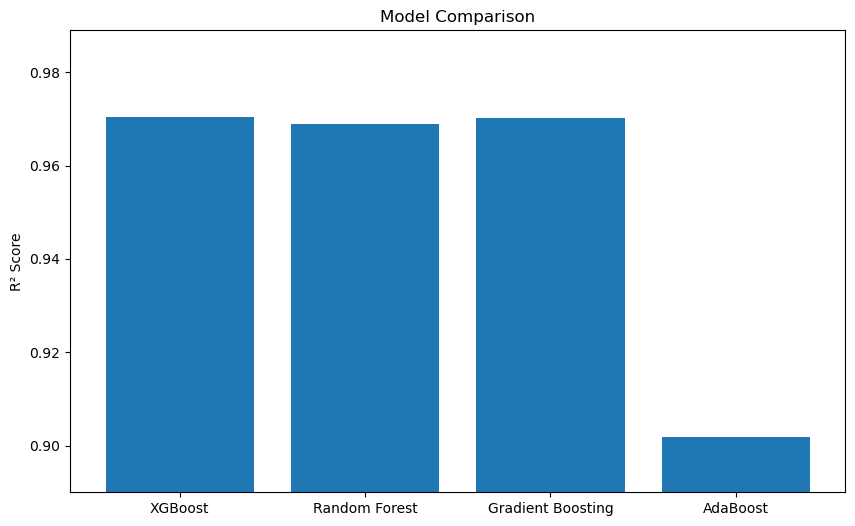

In [121]:
#graficamos con los mejores resultados de cada , valores entre 0.8 y 1.0 de R2 score, aumentamos el tamaño de imagen
import matplotlib.pyplot as plt
models = ['XGBoost', 'Random Forest', 'Gradient Boosting', 'AdaBoost']
scores = [xgb_best_result['score'], random_forest_best_result['score'], gradient_boosting_best_result['score'], adaboost_best_result['score']]
plt.figure(figsize=(10,6))
plt.bar(models, scores)
plt.ylim(0.89, 0.989)
plt.ylabel('R² Score')
plt.title('Model Comparison')
plt.show()

In [ ]:
# Visualizacion de resultados
import matplotlib.pyplot as plt

plt.figure() 
plt.title('Total bill plotted against tip') 
plt.xlabel('Cement') 
plt.ylabel('Concrete Compressive Strength') 
plt.plot(X_test.adult_mortality	, y_test, 'bo') 

plt.plot(X_test.adult_mortality	, y_predict, 'ro') 
#plt.axis([0, 25, 0, 25]) 
plt.grid(True) 
plt.show()

## Model

In [97]:
import xgboost as xgb

In [122]:
#model = xgb.XGBRegressor(objective ='reg:squarederror',learning_rate = 0.2, max_depth = 5, n_estimators = 500)
model = xgb.XGBRegressor(objective ='reg:squarederror',learning_rate = 0.1, max_depth = 7, n_estimators = 500)

In [123]:
model.fit(X_train_dict, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [124]:
y_pred = model.predict(X_test_dict)

In [125]:
model.score(X_train_dict, y_train)

0.9999816154616783

In [157]:
model.score(X_test_dict, y_test)

0.9703623972344201

In [158]:
y_predict = model.predict(X_test_dict)

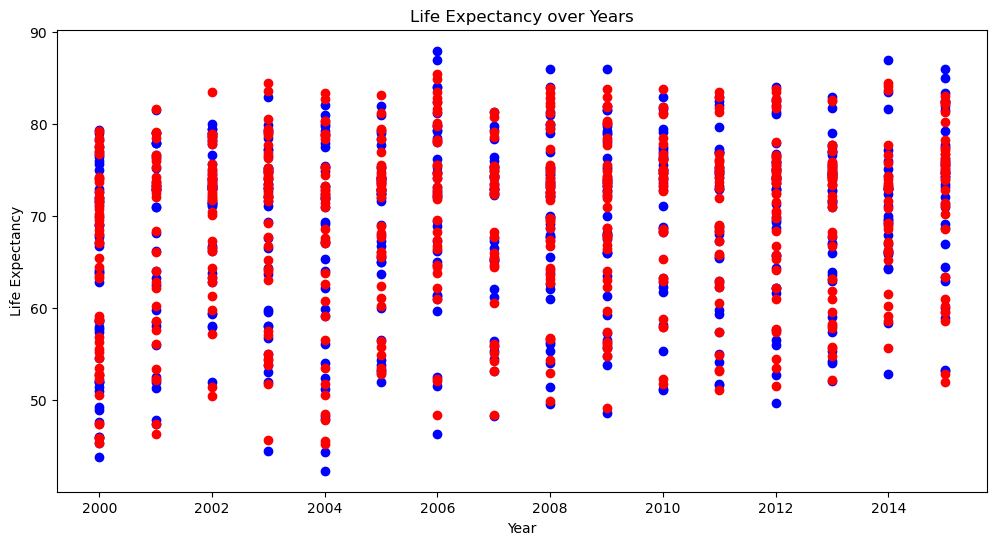

In [ ]:
#grafica de linea data test entre years y media de life_expectancy

plt.figure(figsize=(12, 6))
plt.title('Life Expectancy over Years')    
plt.plot(X_test.year	, y_test, 'bo') 
plt.plot(X_test.year	, y_predict, 'ro')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
#pivot entre years y media de life_expectancy   
plt.show()


In [ ]:
# Crear dataframe para graficar resultados
df_grafica = pd.DataFrame({'year': X_test.year, 'actual_life_expectancy': y_test, 'predicted_life_expectancy': y_predict})

<Axes: title={'center': 'Life Expectancy: Actual vs Predicted'}, xlabel='Year', ylabel='Life Expectancy'>

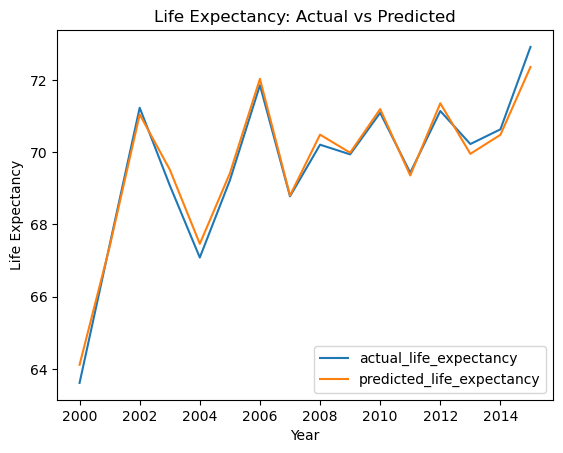

In [194]:
#pivot mean

df_p = df_grafica.pivot_table(values=['actual_life_expectancy', 'predicted_life_expectancy'], index='year', aggfunc='mean')

#df_grafica.plot(x='year', y=['actual_life_expectancy', 'predicted_life_expectancy'], title='Life Expectancy: Actual vs Predicted', ylabel='Life Expectancy', xlabel='Year')
df_p.plot(title='Life Expectancy: Actual vs Predicted', ylabel='Life Expectancy', xlabel='Year')

## Seleccionando

In [204]:
model.feature_importances_


array([0.00088737, 0.00105089, 0.00167315, 0.0359355 , 0.00483493,
       0.00310841, 0.0016273 , 0.0013098 , 0.00102499, 0.00954414,
       0.027851  , 0.00245102, 0.00185422, 0.00245571, 0.77521354,
       0.00118011, 0.00110562, 0.00446498, 0.00832303, 0.09997674,
       0.0141276 ], dtype=float32)

In [205]:
model.get_booster().get_score(importance_type='total_gain')

{'country_idx': 3955.343505859375,
 'status_idx': 199.4102783203125,
 'year': 6736.85498046875,
 'adult_mortality': 151203.234375,
 'infant_deaths': 6321.48291015625,
 'alcohol': 8352.763671875,
 'percentage_expenditure': 3195.43115234375,
 'hepatitis_b': 2074.89892578125,
 'measles': 2133.171875,
 'bmi': 23531.736328125,
 'under-five_deaths': 14047.39453125,
 'polio': 3069.595458984375,
 'total_expenditure': 4308.3974609375,
 'diphtheria': 2236.697509765625,
 'hiv/aids': 678555.25,
 'gdp': 1961.91259765625,
 'population': 2053.290771484375,
 'thinness__1-19_years': 5296.6474609375,
 'thinness_5-9_years': 6296.9169921875,
 'income_composition_of_resources': 179795.40625,
 'schooling': 23054.53515625}

In [206]:
model.get_booster().get_score(importance_type='gain')

{'country_idx': 1.0863343477249146,
 'status_idx': 1.2865179777145386,
 'year': 2.0482988357543945,
 'adult_mortality': 43.992794036865234,
 'infant_deaths': 5.918991565704346,
 'alcohol': 3.805359363555908,
 'percentage_expenditure': 1.9921640157699585,
 'hepatitis_b': 1.6034767627716064,
 'measles': 1.2548069953918457,
 'bmi': 11.68407917022705,
 'under-five_deaths': 34.095619201660156,
 'polio': 3.000581979751587,
 'total_expenditure': 2.2699670791625977,
 'diphtheria': 3.0063138008117676,
 'hiv/aids': 949.0283203125,
 'gdp': 1.4447073936462402,
 'population': 1.3535206317901611,
 'thinness__1-19_years': 5.4660964012146,
 'thinness_5-9_years': 10.189186096191406,
 'income_composition_of_resources': 122.39305877685547,
 'schooling': 17.295225143432617}

In [207]:
pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

hiv/aids                           0.775214
income_composition_of_resources    0.099977
adult_mortality                    0.035936
under-five_deaths                  0.027851
schooling                          0.014128
bmi                                0.009544
thinness_5-9_years                 0.008323
infant_deaths                      0.004835
thinness__1-19_years               0.004465
alcohol                            0.003108
diphtheria                         0.002456
polio                              0.002451
total_expenditure                  0.001854
year                               0.001673
percentage_expenditure             0.001627
hepatitis_b                        0.001310
gdp                                0.001180
population                         0.001106
status_idx                         0.001051
measles                            0.001025
country_idx                        0.000887
dtype: float32

#data

In [217]:
from sklearn.feature_selection import RFE

model_estimator = xgb.XGBRegressor(objective ='reg:squarederror',learning_rate = 0.1, max_depth = 7, n_estimators = 500)
rfe = RFE(estimator=model_estimator, n_features_to_select=0.75, verbose=1)
rfe.fit(X_train_dict, y_train)

Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.


,estimator,"XGBRegressor(...ree=None, ...)"
,n_features_to_select,0.75
,step,1
,verbose,1
,importance_getter,'auto'
,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None


In [218]:
X_train.columns[rfe.support_]

Index(['adult_mortality', 'infant_deaths', 'alcohol', 'percentage_expenditure',
       'hepatitis_b', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'thinness__1-19_years', 'thinness_5-9_years',
       'income_composition_of_resources', 'schooling'],
      dtype='object')

In [256]:
X_train.iloc[:,rfe.support_]

,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
2259,126.0,1.0,9.380000,742.510971,97.000000,58.3,1.0,93.0,9.890000,91.0,0.1,2.1,2.1,0.767000,14.000000
1677,179.0,0.0,4.140000,369.631710,88.000000,26.4,0.0,88.0,4.240000,88.0,0.1,7.9,7.9,0.683000,12.500000
2775,376.0,92.0,3.440000,0.000000,86.000000,19.6,138.0,89.0,4.210000,86.0,7.4,7.3,7.3,0.627419,11.999639
2503,62.0,0.0,6.900000,8105.590882,80.960842,56.5,0.0,98.0,9.230000,98.0,0.1,1.3,1.3,0.897000,15.700000
1088,275.0,4.0,4.614856,0.000000,87.000000,26.3,6.0,87.0,5.930163,87.0,3.2,7.1,7.0,0.421000,9.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,63.0,0.0,7.380000,335.518057,86.000000,67.1,0.0,73.0,8.330000,73.0,0.1,0.8,0.7,0.815000,14.400000
1095,297.0,5.0,2.640000,28.301911,80.960842,21.9,7.0,77.0,6.500000,77.0,6.0,8.5,8.4,0.398000,8.800000
1130,29.0,17.0,5.570000,38.109043,80.960842,38.5,24.0,6.0,4.410000,6.0,3.9,4.4,4.4,0.452000,8.200000
1294,75.0,2.0,9.690000,3.122230,95.000000,55.7,3.0,96.0,8.110000,93.0,0.1,0.5,0.5,0.828000,14.900000


In [269]:
X_test.iloc[9,rfe.support_].to_json()

'{"adult_mortality":235.0,"infant_deaths":7.0,"alcohol":6.64,"percentage_expenditure":808.243302,"hepatitis_b":99.0,"bmi":48.5,"under-five_deaths":8.0,"polio":99.0,"total_expenditure":4.13,"diphtheria":98.0,"hiv\\/aids":0.1,"thinness__1-19_years":2.3,"thinness_5-9_years":2.5,"income_composition_of_resources":0.758,"schooling":14.6}'

In [ ]:
y_test[0:10]

2259    74.9
1677    71.5
2775    56.2
2503    81.1
1088    58.9
1846    85.0
2671    72.9
2228    73.9
1099    53.5
542     48.0
Name: life_expectancy, dtype: float64

In [224]:
model_estimator.fit(X_train_dict.iloc[:,rfe.support_],y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [243]:
columns = X_train_dict.iloc[:,rfe.support_].columns

In [246]:
model_estimator.score(X_train_dict[columns],y_train)

0.9999654778547094

In [247]:
model_estimator.score(X_test_dict[columns],y_test)

0.970683864192242

In [248]:
y_predict = model_estimator.predict(X_test_dict[columns])

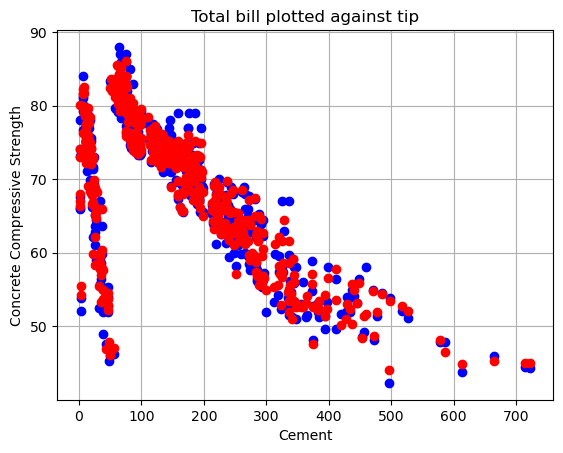

In [236]:
# Visualizacion de resultados
import matplotlib.pyplot as plt

plt.figure() 
plt.title('Total bill plotted against tip') 
plt.xlabel('Cement') 
plt.ylabel('Concrete Compressive Strength') 
plt.plot(X_test.adult_mortality	, y_test, 'bo') 

plt.plot(X_test.adult_mortality	, y_predict, 'ro') 
#plt.axis([0, 25, 0, 25]) 
plt.grid(True) 
plt.show()

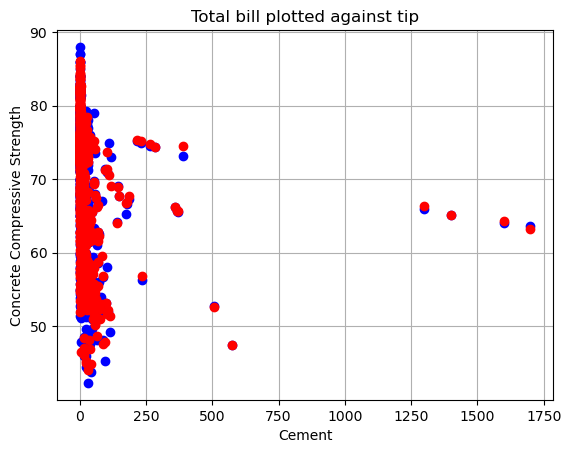

In [237]:
# grafica entre infant deaths and life expectancy
# Visualizacion de resultados
import matplotlib.pyplot as plt

plt.figure() 
plt.title('Total bill plotted against tip') 
plt.xlabel('Cement') 
plt.ylabel('Concrete Compressive Strength') 
plt.plot(X_test.infant_deaths	, y_test, 'bo') 

plt.plot(X_test.infant_deaths	, y_predict, 'ro') 
#plt.axis([0, 25, 0, 25]) 
plt.grid(True) 
plt.show()

## Save Model

array(['adult_mortality', 'infant_deaths', 'alcohol',
       'percentage_expenditure', 'hepatitis_b', 'bmi',
       'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria',
       'hiv/aids', 'thinness__1-19_years', 'thinness_5-9_years',
       'income_composition_of_resources', 'schooling'], dtype=object)

In [229]:
#import pi
import pickle


In [255]:
with open('model/model_life_expectancy_edaix.pkl', 'wb') as f_out:
    pickle.dump((pipeline, model_estimator,columns.values, country_mapping, status_mapping), f_out)